# Iot based farming monitoring system #

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.subplots as sp
import plotly.figure_factory as ff
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import requests
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier
from IPython.display import display

In [82]:
import pandas as pd

# Load the CSV file directly from the raw GitHub link
csv_url = 'https://raw.githubusercontent.com/Bishwaprotapi/Iot-based-farming-monitoring-system/main/Smart_Farming_Crop_Yield_2024.csv'
df = pd.read_csv(csv_url)

# Display the first few rows of the dataframe
display(df)

farm_id       region crop_type  soil_moisture_%  soil_pH  temperature_C  \
0    FARM0001  North India     Wheat            35.95     5.99          17.79   
1    FARM0002    South USA   Soybean            19.74     7.24          30.18   
2    FARM0003    South USA     Wheat            29.32     7.16          27.37   
3    FARM0004  Central USA     Maize            17.33     6.03          33.73   
4    FARM0005  Central USA    Cotton            19.37     5.92          33.86   
..        ...          ...       ...              ...      ...            ...   
495  FARM0496  Central USA      Rice            42.85     6.70          30.85   
496  FARM0497  North India   Soybean            34.22     6.75          17.46   
497  FARM0498  North India    Cotton            15.93     5.72          17.03   
498  FARM0499  Central USA   Soybean            38.61     6.20          17.08   
499  FARM0500  North India     Wheat            30.22     7.42          20.57   

     rainfall_mm  humidity_%  sunlight_hours irrigation_type  ... sowing_date  \
0          75.62       77.03            7.27             NaN  ...  2024-01-08   
1          89.91       61.13            5.67       Sprinkler  ...  2024-02-04   
2         265.43       68.87            8.23            Drip  ...  2024-02-03   
3         212.01       70.46            5.03       Sprinkler  ...  2024-02-21   
4         269.09       55.73            7.93             NaN  ...  2024-02-05   
..           ...         ...             ...             ...  ...         ...   
495        52.35       79.58            7.25          Manual  ...  2024-01-16   
496       256.23       45.14            5.78             NaN  ...  2024-01-01   
497       288.96       57.87            7.69            Drip  ...  2024-01-02   
498       279.06       73.09            9.60            Drip  ...  2024-01-25   
499        72.61       89.74            5.09             NaN  ...  2024-02-16   

     harvest_date total_days yield_kg_per_hectare  sensor_id   timestamp  \
0      2024-05-09        122              4408.07   SENS0001  2024-03-19   
1      2024-05-26        112              5389.98   SENS0002  2024-04-21   
2      2024-06-26        144              2931.16   SENS0003  2024-02-28   
3      2024-07-04        134              4227.80   SENS0004  2024-05-14   
4      2024-05-20        105              4979.96   SENS0005  2024-04-13   
..            ...        ...                  ...        ...         ...   
495    2024-06-02        138              4251.40   SENS0496  2024-05-08   
496    2024-04-14        104              3708.54   SENS0497  2024-01-19   
497    2024-05-09        128              2604.41   SENS0498  2024-04-20   
498    2024-06-04        131              2586.36   SENS0499  2024-03-02   
499    2024-06-29        134              5891.40   SENS0500  2024-05-11   

      latitude  longitude  NDVI_index  crop_disease_status  
0    14.970941  82.997689        0.63                 Mild  
1    16.613022  70.869009        0.58                  NaN  
2    19.503156  79.068206        0.80                 Mild  
3    31.071298  85.519998        0.44                  NaN  
4    16.568540  81.691720        0.84               Severe  
..         ...        ...         ...                  ...  
495  30.386623  76.147700        0.59                 Mild  
496  18.832748  75.736924        0.85               Severe  
497  23.262016  81.992230        0.71                 Mild  
498  19.764989  84.426869        0.77               Severe  
499  13.455532  88.880605        0.85               Severe  

[500 rows x 22 columns]

In [83]:
df.head(10)

farm_id       region crop_type  soil_moisture_%  soil_pH  temperature_C  \
0  FARM0001  North India     Wheat            35.95     5.99          17.79   
1  FARM0002    South USA   Soybean            19.74     7.24          30.18   
2  FARM0003    South USA     Wheat            29.32     7.16          27.37   
3  FARM0004  Central USA     Maize            17.33     6.03          33.73   
4  FARM0005  Central USA    Cotton            19.37     5.92          33.86   
5  FARM0006  Central USA      Rice            44.91     5.78          24.87   
6  FARM0007  North India   Soybean            36.28     7.04          21.80   
7  FARM0008  East Africa     Maize            27.10     5.72          22.26   
8  FARM0009  Central USA   Soybean            40.54     6.35          19.24   
9  FARM0010  East Africa      Rice            10.25     6.92          16.18   

   rainfall_mm  humidity_%  sunlight_hours irrigation_type  ... sowing_date  \
0        75.62       77.03            7.27             NaN  ...  2024-01-08   
1        89.91       61.13            5.67       Sprinkler  ...  2024-02-04   
2       265.43       68.87            8.23            Drip  ...  2024-02-03   
3       212.01       70.46            5.03       Sprinkler  ...  2024-02-21   
4       269.09       55.73            7.93             NaN  ...  2024-02-05   
5       238.95       83.06            4.92       Sprinkler  ...  2024-01-13   
6       123.38       47.91            4.02          Manual  ...  2024-03-04   
7       296.33       80.34            5.44       Sprinkler  ...  2024-01-24   
8       184.82       76.50            5.21          Manual  ...  2024-03-12   
9        66.85       41.57            5.98       Sprinkler  ...  2024-01-18   

   harvest_date total_days yield_kg_per_hectare  sensor_id   timestamp  \
0    2024-05-09        122              4408.07   SENS0001  2024-03-19   
1    2024-05-26        112              5389.98   SENS0002  2024-04-21   
2    2024-06-26        144              2931.16   SENS0003  2024-02-28   
3    2024-07-04        134              4227.80   SENS0004  2024-05-14   
4    2024-05-20        105              4979.96   SENS0005  2024-04-13   
5    2024-05-06        114              4383.55   SENS0006  2024-03-12   
6    2024-07-27        145              4501.20   SENS0007  2024-07-11   
7    2024-05-24        121              5264.09   SENS0008  2024-04-30   
8    2024-07-08        118              5598.46   SENS0009  2024-05-08   
9    2024-04-25         98              4893.41   SENS0010  2024-03-31   

    latitude  longitude  NDVI_index  crop_disease_status  
0  14.970941  82.997689        0.63                 Mild  
1  16.613022  70.869009        0.58                  NaN  
2  19.503156  79.068206        0.80                 Mild  
3  31.071298  85.519998        0.44                  NaN  
4  16.568540  81.691720        0.84               Severe  
5  23.227859  89.421568        0.82                  NaN  
6  25.224255  73.056785        0.76                  NaN  
7  23.317654  72.515210        0.70                 Mild  
8  13.025105  74.493947        0.50                 Mild  
9  24.405291  74.859945        0.58               Severe  

[10 rows x 22 columns]

# Data Preprocessing


---
 The following steps are performed on the dataset in this section:
 + Dropping Redudant Columns
 + Checking For Duplicated Rows
 + Checking For Missing Values

In [84]:
# 1. Dropping Redundant Columns
# Let's check the column names and drop any columns that are clearly redundant, such as index columns or unnamed columns

# List dataframe columns
print("Columns before dropping redundant columns:", df.columns.tolist())

Columns before dropping redundant columns: ['farm_id', 'region', 'crop_type', 'soil_moisture_%', 'soil_pH', 'temperature_C', 'rainfall_mm', 'humidity_%', 'sunlight_hours', 'irrigation_type', 'fertilizer_type', 'pesticide_usage_ml', 'sowing_date', 'harvest_date', 'total_days', 'yield_kg_per_hectare', 'sensor_id', 'timestamp', 'latitude', 'longitude', 'NDVI_index', 'crop_disease_status']


In [85]:
# Drop any columns that are unnamed (usually created after saving from Excel/CSV)
redundant_cols = [col for col in df.columns if "unnamed" in col.lower() or "index" in col.lower()]
if redundant_cols:
    df.drop(columns=redundant_cols, inplace=True)
    print(f"Dropped redundant columns: {redundant_cols}")
else:
    print("No explicit redundant columns found.")

print("Columns after dropping redundant columns:", df.columns.tolist())

Dropped redundant columns: ['NDVI_index']
Columns after dropping redundant columns: ['farm_id', 'region', 'crop_type', 'soil_moisture_%', 'soil_pH', 'temperature_C', 'rainfall_mm', 'humidity_%', 'sunlight_hours', 'irrigation_type', 'fertilizer_type', 'pesticide_usage_ml', 'sowing_date', 'harvest_date', 'total_days', 'yield_kg_per_hectare', 'sensor_id', 'timestamp', 'latitude', 'longitude', 'crop_disease_status']


In [86]:
# 2. Checking for Duplicated Rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

if num_duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"Duplicated rows dropped. Data now has {len(df)} rows.")
else:
    print("No duplicated rows found.")

Number of duplicated rows: 0
No duplicated rows found.


In [87]:
# 3. Checking for Missing Values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
farm_id                   0
region                    0
crop_type                 0
soil_moisture_%           0
soil_pH                   0
temperature_C             0
rainfall_mm               0
humidity_%                0
sunlight_hours            0
irrigation_type         150
fertilizer_type           0
pesticide_usage_ml        0
sowing_date               0
harvest_date              0
total_days                0
yield_kg_per_hectare      0
sensor_id                 0
timestamp                 0
latitude                  0
longitude                 0
crop_disease_status     130
dtype: int64


In [88]:
# Optionally, show percentage of missing values for each column
missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values per column:")
print(missing_percent)


Percentage of missing values per column:
farm_id                  0.0
region                   0.0
crop_type                0.0
soil_moisture_%          0.0
soil_pH                  0.0
temperature_C            0.0
rainfall_mm              0.0
humidity_%               0.0
sunlight_hours           0.0
irrigation_type         30.0
fertilizer_type          0.0
pesticide_usage_ml       0.0
sowing_date              0.0
harvest_date             0.0
total_days               0.0
yield_kg_per_hectare     0.0
sensor_id                0.0
timestamp                0.0
latitude                 0.0
longitude                0.0
crop_disease_status     26.0
dtype: float64


In [89]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 21
Number of Instances In Dataset :  500


In [90]:
# Exploring Information About Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   farm_id               500 non-null    object 
 1   region                500 non-null    object 
 2   crop_type             500 non-null    object 
 3   soil_moisture_%       500 non-null    float64
 4   soil_pH               500 non-null    float64
 5   temperature_C         500 non-null    float64
 6   rainfall_mm           500 non-null    float64
 7   humidity_%            500 non-null    float64
 8   sunlight_hours        500 non-null    float64
 9   irrigation_type       350 non-null    object 
 10  fertilizer_type       500 non-null    object 
 11  pesticide_usage_ml    500 non-null    float64
 12  sowing_date           500 non-null    object 
 13  harvest_date          500 non-null    object 
 14  total_days            500 non-null    int64  
 15  yield_kg_per_hectare  5

In [91]:
# Checking For Duplicate Rows In Dataset
print('Number of Duplicated Rows :',df.duplicated().sum())
# Checking For Missing Values In Dataset
print('Number of Missing Values In Dataset :',df.isnull().sum())
# Checking For Unique Values In Dataset
print('Number of Unique Values In Dataset :',df.nunique())
# Checking For Duplicate Rows In Dataset
print('Number of Duplicated Rows :',df.duplicated().sum())

Number of Duplicated Rows : 0
Number of Missing Values In Dataset : farm_id                   0
region                    0
crop_type                 0
soil_moisture_%           0
soil_pH                   0
temperature_C             0
rainfall_mm               0
humidity_%                0
sunlight_hours            0
irrigation_type         150
fertilizer_type           0
pesticide_usage_ml        0
sowing_date               0
harvest_date              0
total_days                0
yield_kg_per_hectare      0
sensor_id                 0
timestamp                 0
latitude                  0
longitude                 0
crop_disease_status     130
dtype: int64
Number of Unique Values In Dataset : farm_id                 500
region                    5
crop_type                 5
soil_moisture_%         475
soil_pH                 184
temperature_C           448
rainfall_mm             496
humidity_%              481
sunlight_hours          332
irrigation_type           3
fertilizer_typ

# Exploratry Data Analysis

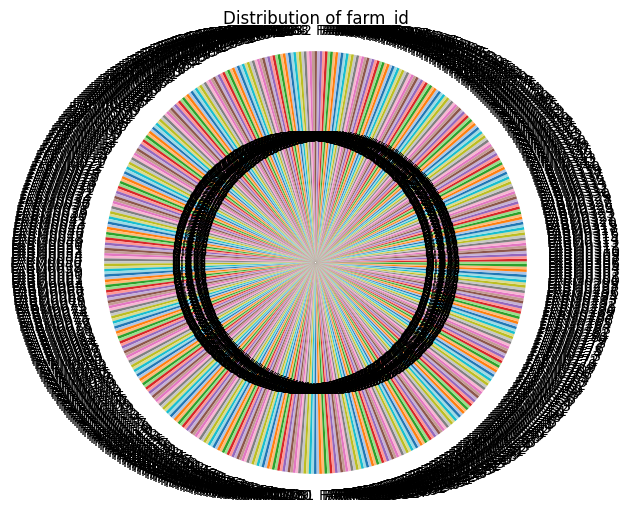

Figure saved as: distribution_farm_id.png

Number of Unique Values in 'farm_id': 500


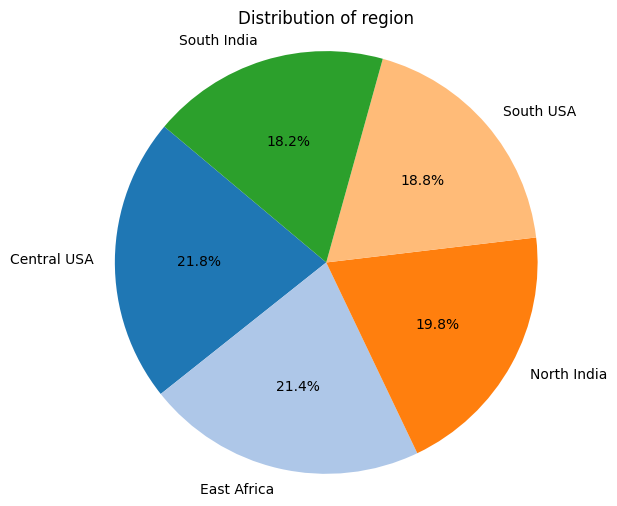

Figure saved as: distribution_region.png

Number of Unique Values in 'region': 5


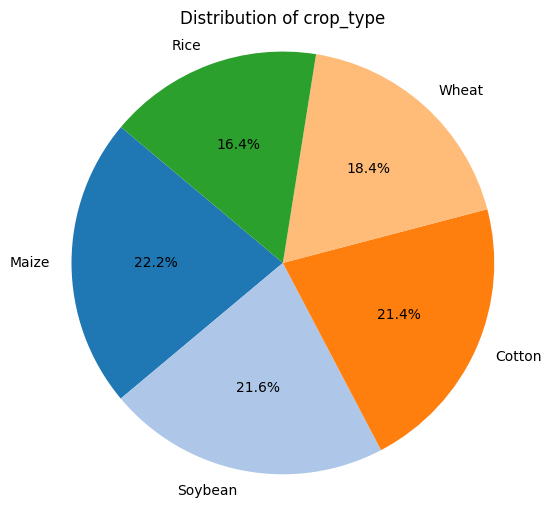

Figure saved as: distribution_crop_type.png

Number of Unique Values in 'crop_type': 5


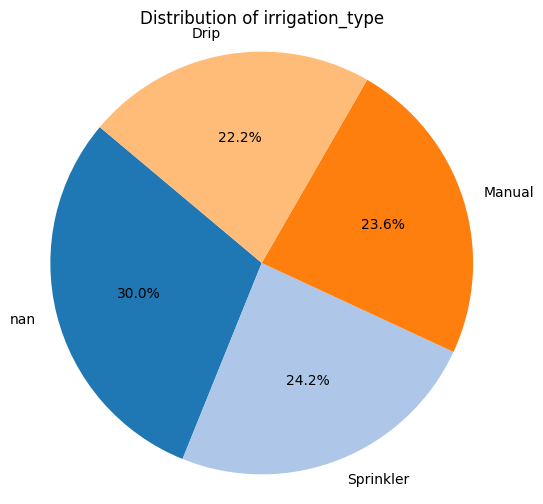

Figure saved as: distribution_irrigation_type.png

Number of Unique Values in 'irrigation_type': 4


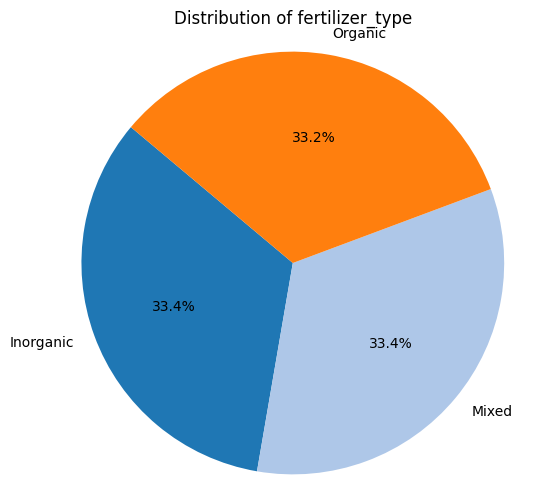

Figure saved as: distribution_fertilizer_type.png

Number of Unique Values in 'fertilizer_type': 3


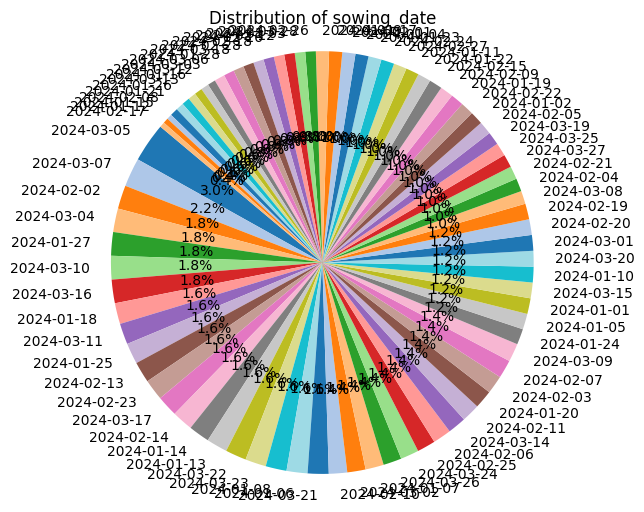

Figure saved as: distribution_sowing_date.png

Number of Unique Values in 'sowing_date': 84


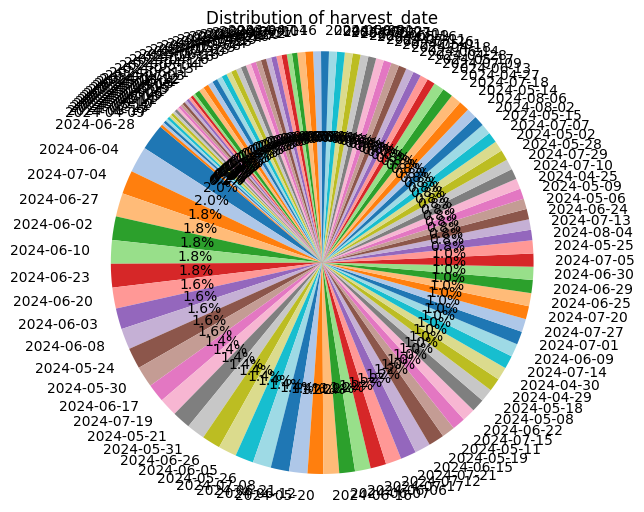

Figure saved as: distribution_harvest_date.png

Number of Unique Values in 'harvest_date': 123


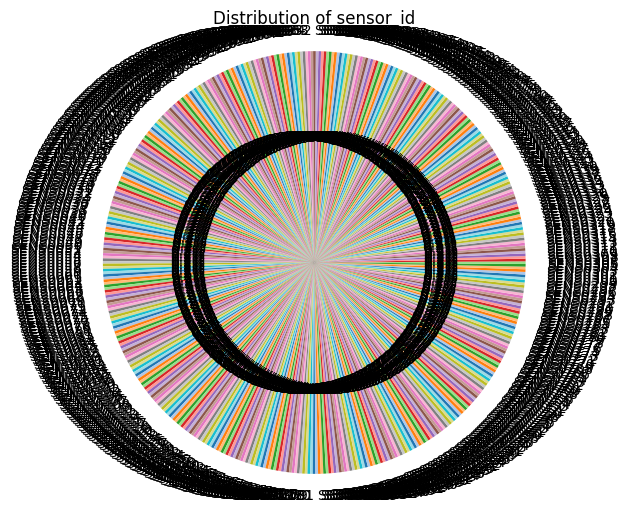

Figure saved as: distribution_sensor_id.png

Number of Unique Values in 'sensor_id': 500


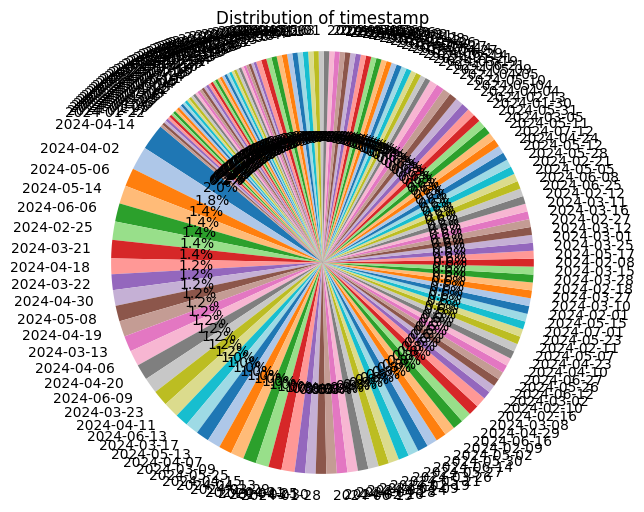

Figure saved as: distribution_timestamp.png

Number of Unique Values in 'timestamp': 172


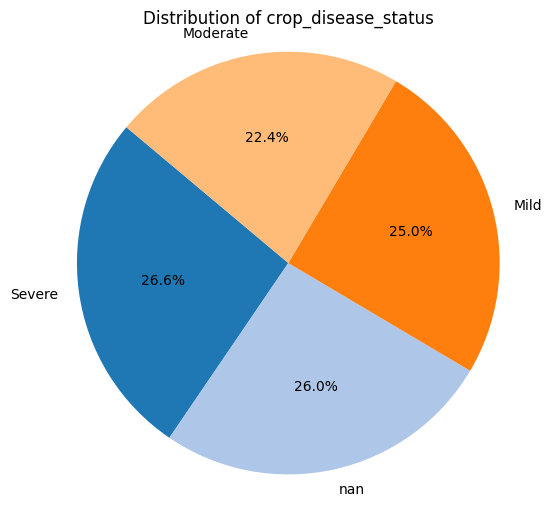

Figure saved as: distribution_crop_disease_status.png

Number of Unique Values in 'crop_disease_status': 4


In [125]:
# Visualize the balance of data in categorical features using pie charts

import matplotlib.pyplot as plt

categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    value_counts = df[col].value_counts(dropna=False)
    plt.figure(figsize=(6, 6))
    plt.pie(
        value_counts,
        labels=value_counts.index.astype(str),
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.tab20.colors
    )
    plt.title(f"Distribution of {col}")
    plt.axis('equal')
    # Save the figure with the correct name
    fig_name = f"distribution_{col}.png"
    plt.savefig(fig_name, bbox_inches='tight')
    plt.show()
    print(f"Figure saved as: {fig_name}")
    print(f"\nNumber of Unique Values in '{col}': {df[col].nunique(dropna=False)}")


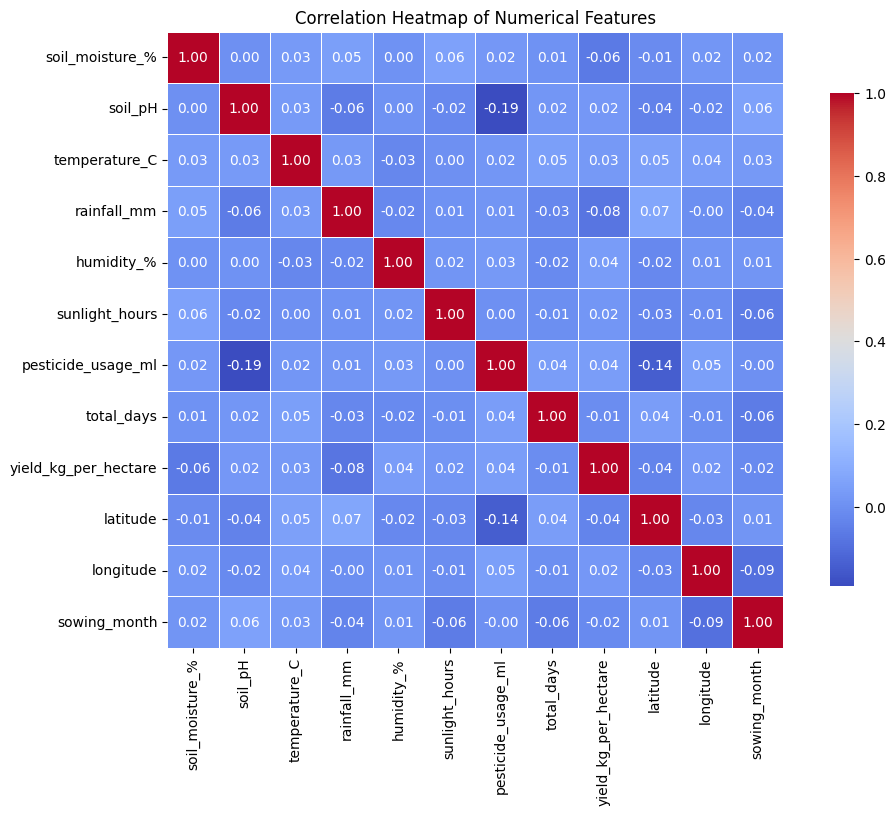

Figure saved as: correlation_heatmap.png


In [126]:
# Correlation Heatmap for this project

import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numerical columns only
corr_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm', 
    square=True, 
    linewidths=0.5, 
    cbar_kws={'shrink': .8}
)
plt.title('Correlation Heatmap of Numerical Features')
fig_name = "correlation_heatmap.png"
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
print(f"Figure saved as: {fig_name}")

C:\Users\USER\AppData\Local\Temp\ipykernel_14352\3630082894.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='crop_type', y=col, data=df, inner='quartile', palette='Set3')


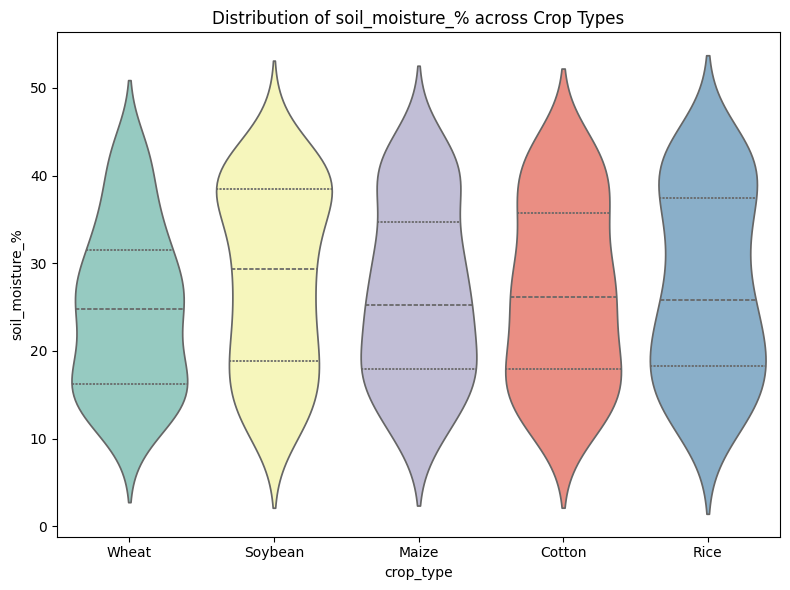

C:\Users\USER\AppData\Local\Temp\ipykernel_14352\3630082894.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='crop_type', y=col, data=df, inner='quartile', palette='Set3')


Figure saved as: violin_soil_moisture_%_by_croptype.png


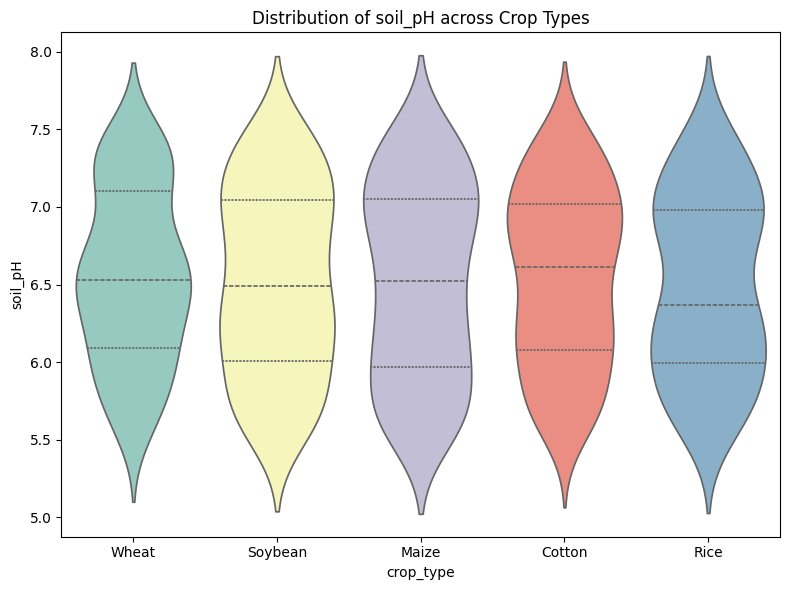

C:\Users\USER\AppData\Local\Temp\ipykernel_14352\3630082894.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='crop_type', y=col, data=df, inner='quartile', palette='Set3')


Figure saved as: violin_soil_pH_by_croptype.png


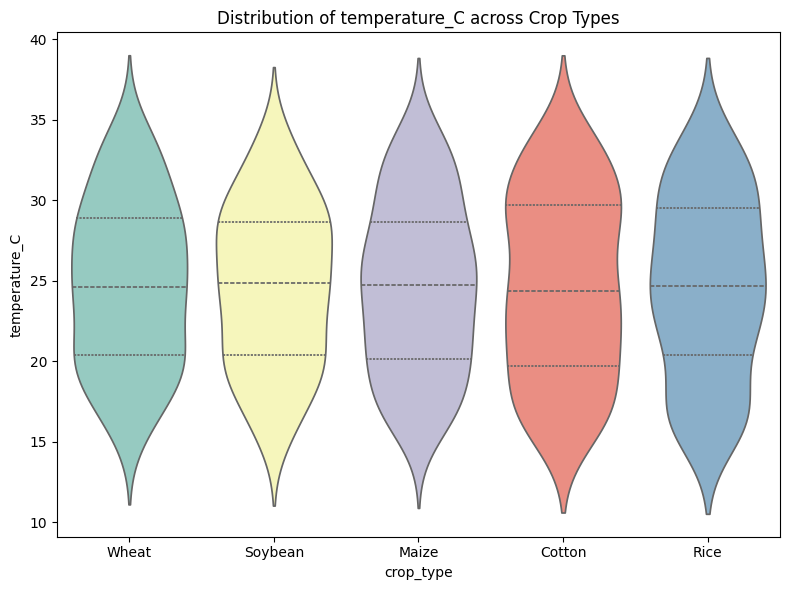

Figure saved as: violin_temperature_C_by_croptype.png


C:\Users\USER\AppData\Local\Temp\ipykernel_14352\3630082894.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='crop_type', y=col, data=df, inner='quartile', palette='Set3')


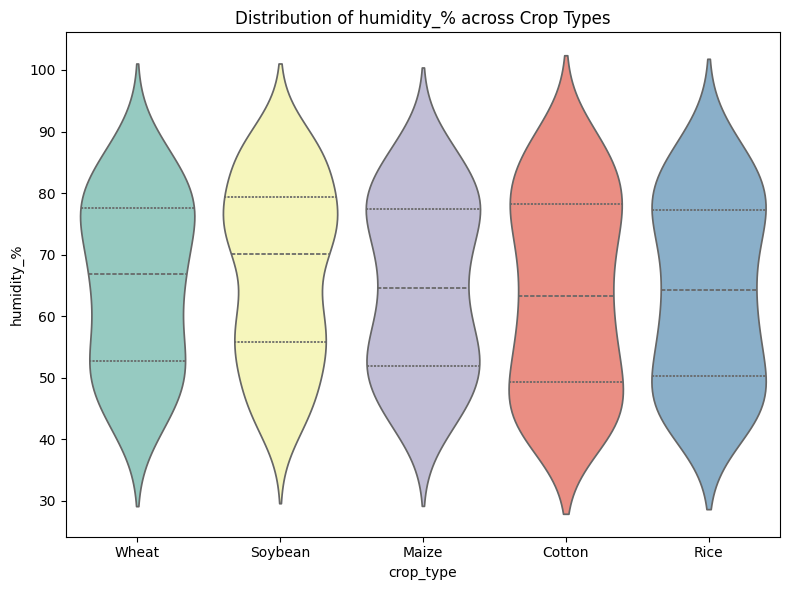

Figure saved as: violin_humidity_%_by_croptype.png


C:\Users\USER\AppData\Local\Temp\ipykernel_14352\3630082894.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='crop_type', y=col, data=df, inner='quartile', palette='Set3')


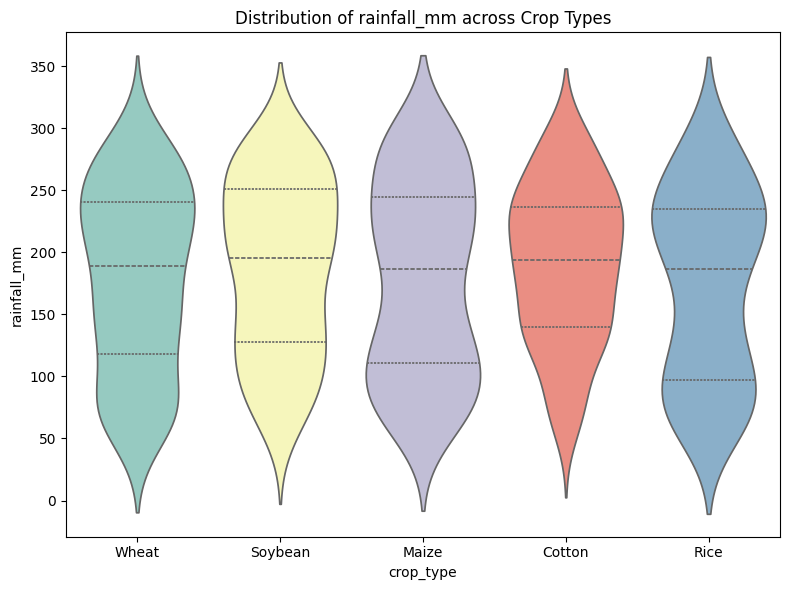

Figure saved as: violin_rainfall_mm_by_croptype.png


In [127]:
# Violin plots: Distribution of important numerical features by crop type

import seaborn as sns

numerical_features = [
    'soil_moisture_%', 'soil_pH', 'temperature_C', 'humidity_%', 
    'rainfall_mm', 'light_intensity_lux', 'CO2_ppm', 'NDVI_index'
]

# Only plot features that are present in the DataFrame
available_numerical_features = [col for col in numerical_features if col in df.columns]

for col in available_numerical_features:
    plt.figure(figsize=(8, 6))
    try:
        sns.violinplot(x='crop_type', y=col, data=df, inner='quartile', palette='Set3')
    except Exception as e:
        print(f"Could not plot for {col}: {e}")
        continue
    plt.title(f'Distribution of {col} across Crop Types')
    plt.tight_layout()
    fig_name = f"violin_{col}_by_croptype.png"
    plt.savefig(fig_name, bbox_inches='tight')
    plt.show()
    print(f"Figure saved as: {fig_name}")

#  Balancing Dataset
# ---
### In this section, we address the issue of dataset imbalance, which is a common problem in machine learning where one class has a significantly larger number of instances than the others. In our dataset, we have 147 samples of Parkinson's disease and only 48 samples of non-Parkinson's disease, making it heavily imbalanced. This imbalance can lead to biased models that perform poorly on the minority class.
# 
### To balance the dataset, we employ the Synthetic Minority Over-sampling Technique (SMOTE). SMOTE is a popular oversampling method that generates new minority class samples by interpolating between existing minority class samples. This approach helps to increase the size of the minority class, making the dataset more balanced and reducing the bias towards the majority class.
# 
### By applying SMOTE, we aim to create a more balanced dataset that allows our machine learning models to learn from a more representative distribution of classes. This, in turn, can improve the model's performance on the minority class and increase its overall accuracy.

In [95]:
# Applying SMOTE to balance the crop_disease_status class in the IoT farming dataset

from imblearn.over_sampling import SMOTE

# Prepare features (X) and target (y)
X = df.drop(columns=['crop_disease_status'])
y = df['crop_disease_status']

# Identify non-numeric columns (object, but skip those clearly meant as numeric)
non_numeric_cols = X.select_dtypes(include=['object']).columns

# For each non-numeric/categorical column (except for obviously ID/date columns), encode with pd.factorize
cols_to_encode = []
for col in non_numeric_cols:
    if col.lower().endswith(("id", "date", "sensor")):
        # Drop identifier and clearly non-predictive columns for SMOTE, as their values are not useful for class balancing
        X = X.drop(columns=[col])
    else:
        cols_to_encode.append(col)

# Now let's encode those that are still categorical using one-hot encoding
X_encoded = pd.get_dummies(X, columns=cols_to_encode, drop_first=True)

# After one-hot, check for float/object columns that have both floats and str (bad data in numeric fields)
for col in X_encoded.columns:
    # If the dtype is object, this is bad, it means mixed-type or leftover string values.
    if X_encoded[col].dtype == object:
        print(f"Warning: Column '{col}' contains non-numeric data after encoding. Removing column.")
        X_encoded = X_encoded.drop(columns=[col])

# At this step, all columns must be numeric
# Coerce values just in case
X_encoded = X_encoded.apply(pd.to_numeric, errors='coerce')

# Remove any columns and rows with NaN (incomplete feature vectors)
X_encoded = X_encoded.dropna(axis=1, how='any')
mask = ~X_encoded.isnull().any(axis=1)
X_encoded_clean = X_encoded[mask]
y_clean = y[mask]

# Remove rows where y is nan or not a string label
mask_target = y_clean.notnull() & y_clean.astype(str).str.strip().ne('')
X_encoded_clean = X_encoded_clean[mask_target]
y_clean = y_clean[mask_target]

# Ensure y is string (SMOTE requires proper class labels)
y_clean = y_clean.astype(str)

# Check that there are only a few unique classes and the class distribution
print("Class distribution before SMOTE:")
print(y_clean.value_counts(dropna=False))

# Sometimes, string values like "nan" come from mixed columns, filter these out
invalid_labels = ['nan', '', 'None', 'NaN']
valid_mask = ~y_clean.str.lower().isin([val.lower() for val in invalid_labels])
X_encoded_clean = X_encoded_clean[valid_mask]
y_clean = y_clean[valid_mask]

print("Class counts (clean):")
print(y_clean.value_counts())

# SMOTE step
smote = SMOTE(random_state=42)

# Fit only if there are at least two classes and enough samples
if len(y_clean.value_counts()) > 1 and all(y_clean.value_counts() >= 2):
    X_resampled, y_resampled = smote.fit_resample(X_encoded_clean, y_clean)
    print("\nClass distribution after SMOTE:")
    print(pd.Series(y_resampled).value_counts())
else:
    print("Cannot apply SMOTE: Not enough classes or too few samples in some classes.")

Class distribution before SMOTE:
crop_disease_status
Severe      133
Mild        125
Moderate    112
Name: count, dtype: int64
Class counts (clean):
crop_disease_status
Severe      133
Mild        125
Moderate    112
Name: count, dtype: int64

Class distribution after SMOTE:
crop_disease_status
Mild        133
Severe      133
Moderate    133
Name: count, dtype: int64


# Machine Learning Model Training
#
In this section, we have trained and evaluated the following Machine Learning Models to predict Parkinson's disease diagnosis:
+ Decision Tree Classifier: This model is simple to implement and interpret, but can be prone to overfitting.

## Decision Tree Classifier

In [96]:
# Classification Report for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Instantiate and train the classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_resampled, y_resampled)

# Predict on training data (or use your test data if available)
y_pred = dt_clf.predict(X_resampled)

# Print the classification report
print("Classification Report for Decision Tree Classifier:")
print(classification_report(y_resampled, y_pred))

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

        Mild       1.00      1.00      1.00       133
    Moderate       1.00      1.00      1.00       133
      Severe       1.00      1.00      1.00       133

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399



In [97]:
df.count()

farm_id                 500
region                  500
crop_type               500
soil_moisture_%         500
soil_pH                 500
temperature_C           500
rainfall_mm             500
humidity_%              500
sunlight_hours          500
irrigation_type         350
fertilizer_type         500
pesticide_usage_ml      500
sowing_date             500
harvest_date            500
total_days              500
yield_kg_per_hectare    500
sensor_id               500
timestamp               500
latitude                500
longitude               500
crop_disease_status     370
dtype: int64

In [98]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for DecisionTreeClassifier
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_resampled, y_resampled)

print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best parameters found by GridSearchCV:
{'criterion': 'gini', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation accuracy: 0.409


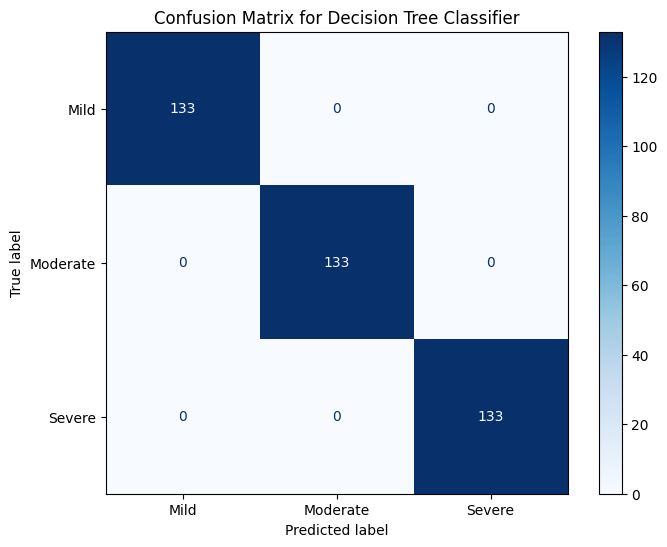

In [128]:
# Confusion Matrix for Decision Tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate predictions for the training data (or test data, if available)
y_pred = dt_clf.predict(X_resampled)

# Compute the confusion matrix
cm = confusion_matrix(y_resampled, y_pred, labels=dt_clf.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_clf.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.savefig('confusion_matrix_decision_tree.png', bbox_inches='tight')
plt.show()

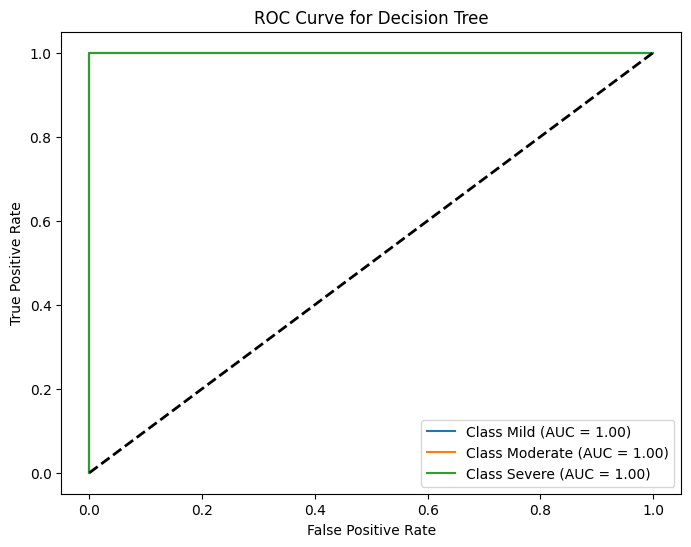

In [129]:
# ROC Curve for Decision Tree
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output for multi-class
y_bin = label_binarize(y_resampled, classes=np.unique(y_resampled))
n_classes = y_bin.shape[1]

# Get probabilities from classifier
y_score = dt_clf.predict_proba(X_resampled)

# Plot ROC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"Class {dt_clf.classes_[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.savefig('roc_curve_decision_tree.png', bbox_inches='tight')
plt.show()

In [101]:
import joblib
# Dumping Decision Tree Classifier
joblib.dump(dt_clf, 'dt_clf.pkl')

['dt_clf.pkl']

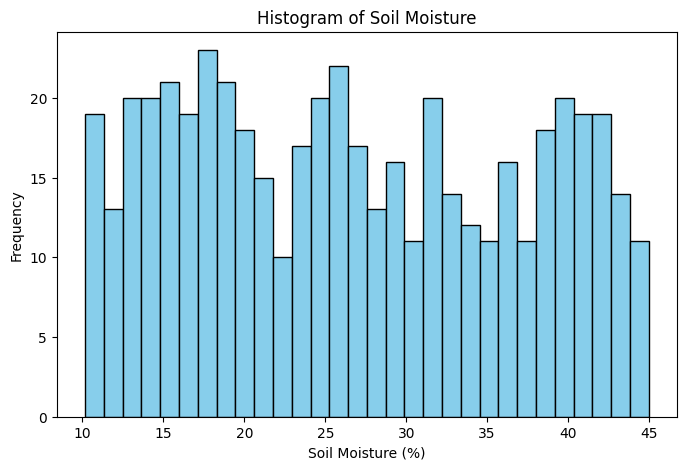

In [ ]:
# 1. Histogram of soil moisture
plt.figure(figsize=(8, 5))
plt.hist(df['soil_moisture_%'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Soil Moisture (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Soil Moisture')
plt.savefig('histogram_soil_moisture.png', bbox_inches='tight')
plt.show()

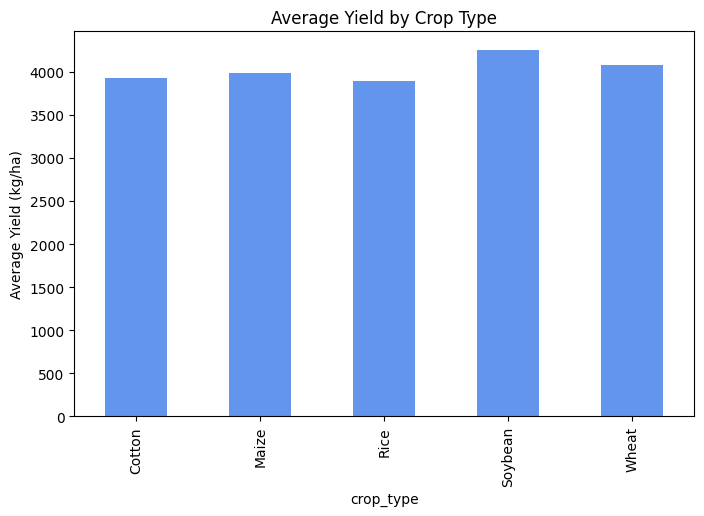

In [130]:
# 2. Bar plot: Average yield by crop type
plt.figure(figsize=(8, 5))
df.groupby('crop_type')['yield_kg_per_hectare'].mean().plot(kind='bar', color='cornflowerblue')
plt.ylabel('Average Yield (kg/ha)')
plt.title('Average Yield by Crop Type')
plt.savefig('barplot_avg_yield_by_crop_type.png', bbox_inches='tight')
plt.show()

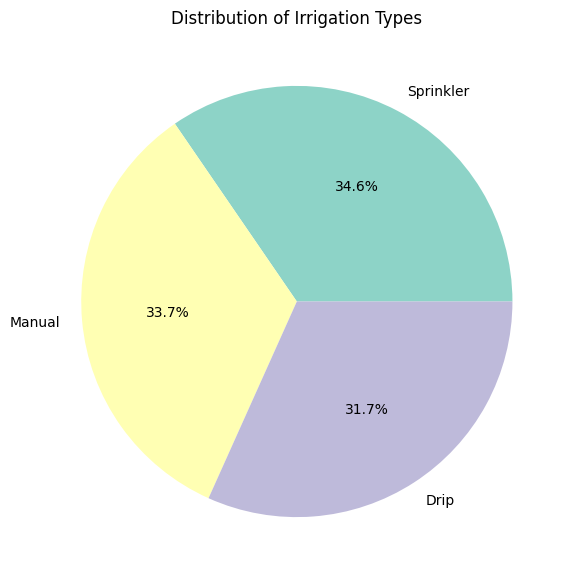

In [131]:
# 3. Pie chart: Distribution of irrigation types
plt.figure(figsize=(7, 7))
df['irrigation_type'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=plt.cm.Set3.colors
)
plt.ylabel('')
plt.title('Distribution of Irrigation Types')
plt.savefig('pie_irrigation_types.png', bbox_inches='tight')
plt.show()

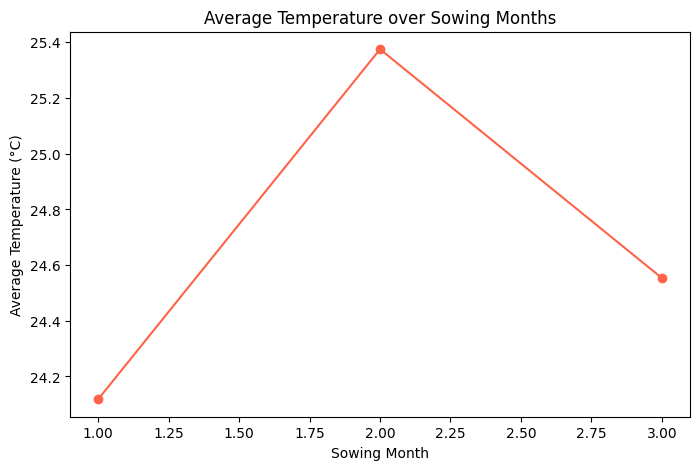

In [132]:
# 4. Line graph: Average temperature over months
df['sowing_month'] = pd.to_datetime(df['sowing_date']).dt.month
temp_trend = df.groupby('sowing_month')['temperature_C'].mean()
plt.figure(figsize=(8, 5))
plt.plot(temp_trend.index, temp_trend.values, marker='o', linestyle='-', color='tomato')
plt.xlabel('Sowing Month')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature over Sowing Months')
plt.savefig('line_avg_temp_over_months.png', bbox_inches='tight')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_14352\4060756014.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='crop_type', y='soil_pH', data=df, palette='Set2')


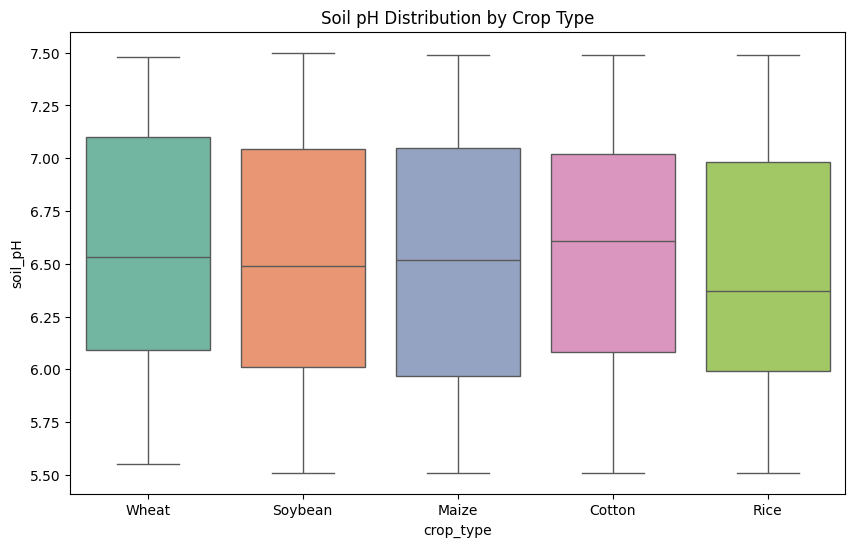

In [133]:
# 5. Boxplot: Soil pH by crop type
plt.figure(figsize=(10, 6))
sns.boxplot(x='crop_type', y='soil_pH', data=df, palette='Set2')
plt.title('Soil pH Distribution by Crop Type')
plt.savefig('boxplot_soil_pH_by_crop_type.png', bbox_inches='tight')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_14352\2741186115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=df, palette='pastel')


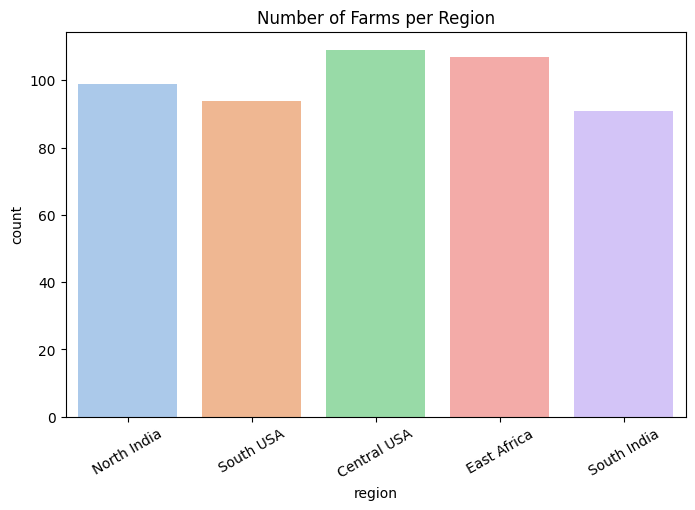

In [134]:
# 6. Countplot: Number of farms per region
plt.figure(figsize=(8, 5))
sns.countplot(x='region', data=df, palette='pastel')
plt.title("Number of Farms per Region")
plt.xticks(rotation=30)
plt.savefig('countplot_farms_per_region.png', bbox_inches='tight')
plt.show()

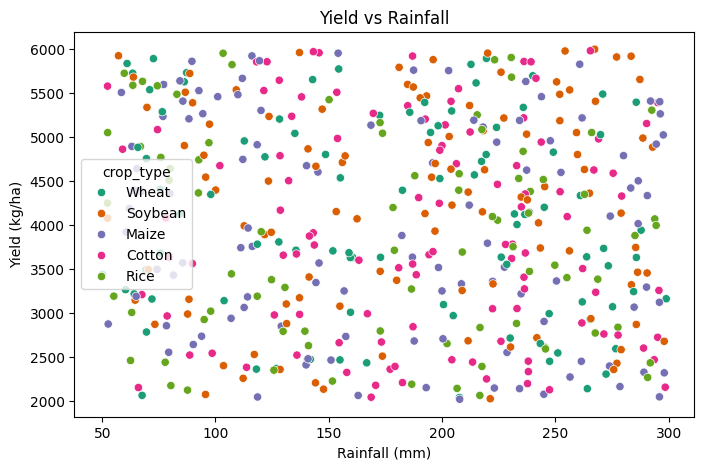

In [135]:
# 7. Scatterplot: Yield vs. Rainfall
plt.figure(figsize=(8, 5))
sns.scatterplot(x='rainfall_mm', y='yield_kg_per_hectare', hue='crop_type', data=df, palette='Dark2')
plt.title("Yield vs Rainfall")
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield (kg/ha)')
plt.savefig('scatterplot_yield_vs_rainfall.png', bbox_inches='tight')
plt.show()


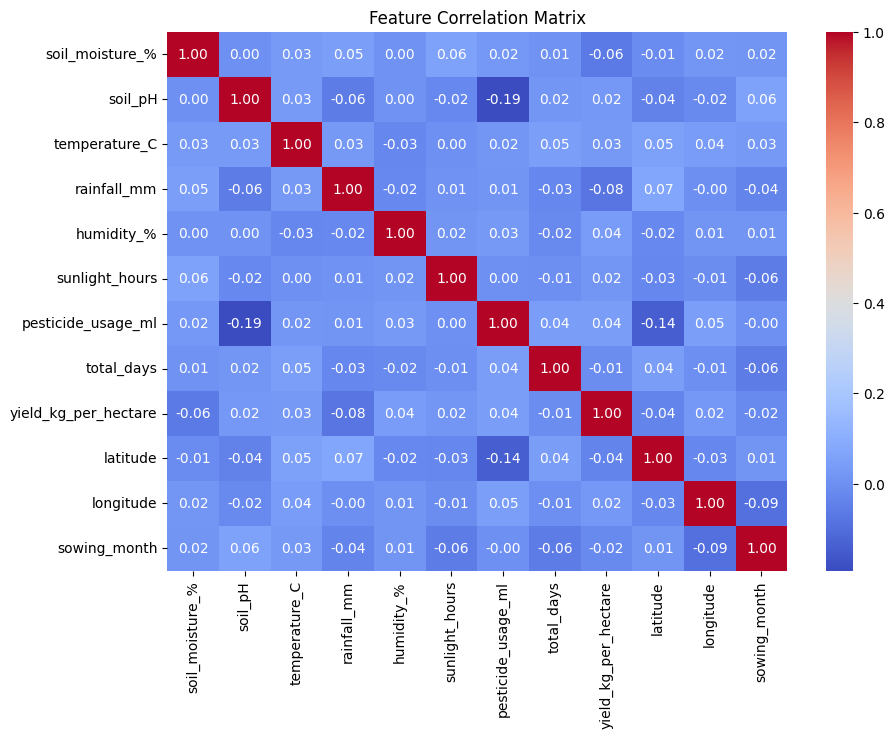

In [136]:
# 8. Heatmap: Correlation matrix
plt.figure(figsize=(10,7))
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.savefig('heatmap_correlation_matrix.png', bbox_inches='tight')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_14352\3467640857.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='crop_disease_status', y='humidity_%', data=df, palette='Set1')


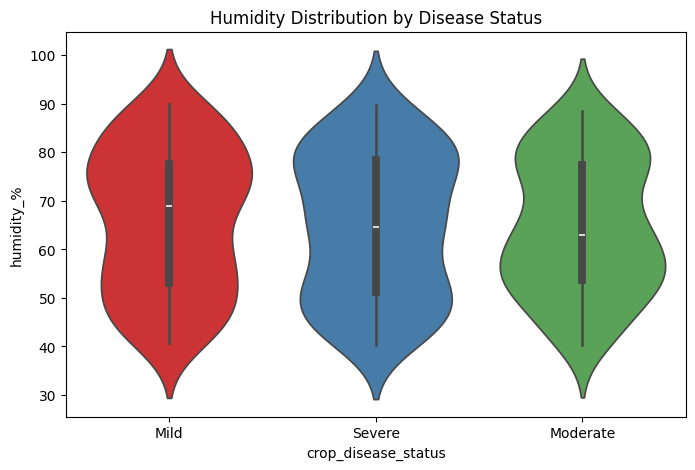

In [137]:
# 9. Violin plot: Humidity percentage by crop disease status
plt.figure(figsize=(8, 5))
sns.violinplot(x='crop_disease_status', y='humidity_%', data=df, palette='Set1')
plt.title("Humidity Distribution by Disease Status")
plt.savefig('violinplot_humidity_by_disease_status.png', bbox_inches='tight')
plt.show()

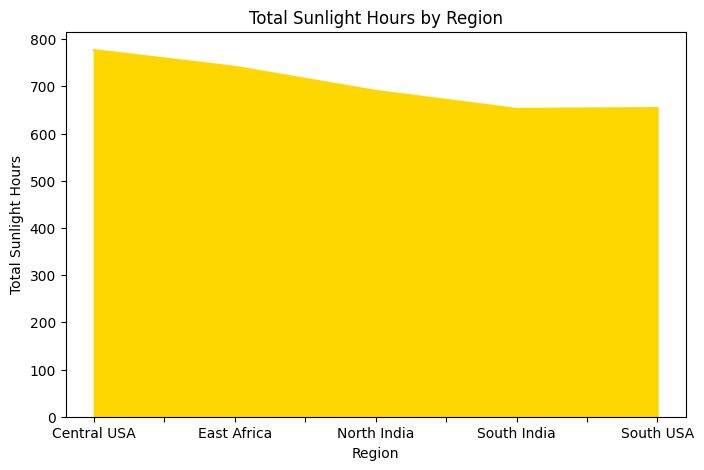

In [138]:
# 10. Area plot: Total sunlight hours by region
region_sun = df.groupby('region')['sunlight_hours'].sum()
plt.figure(figsize=(8, 5))
region_sun.plot(kind='area', color='gold')
plt.title('Total Sunlight Hours by Region')
plt.xlabel('Region')
plt.ylabel('Total Sunlight Hours')
plt.savefig('areaplot_total_sunlight_hours_by_region.png', bbox_inches='tight')
plt.show()

In [142]:
# 11. Point plot: Average NDVI Index by crop type

# First, check if 'NDVI_index' actually exists in the DataFrame columns
if 'NDVI_index' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.pointplot(x='crop_type', y='NDVI_index', data=df, palette='coolwarm')
    plt.title("Average NDVI by Crop Type")
    plt.savefig('pointplot_average_ndvi_by_crop_type.png', bbox_inches='tight')
    plt.show()
else:
    # If not, print available columns for debugging
    print("Column 'NDVI_index' not found in DataFrame.")
    print("Available columns:", df.columns.tolist())

Column 'NDVI_index' not found in DataFrame.
Available columns: ['farm_id', 'region', 'crop_type', 'soil_moisture_%', 'soil_pH', 'temperature_C', 'rainfall_mm', 'humidity_%', 'sunlight_hours', 'irrigation_type', 'fertilizer_type', 'pesticide_usage_ml', 'sowing_date', 'harvest_date', 'total_days', 'yield_kg_per_hectare', 'sensor_id', 'timestamp', 'latitude', 'longitude', 'crop_disease_status', 'sowing_month']


C:\Users\USER\AppData\Local\Temp\ipykernel_14352\2622095065.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='crop_disease_status', y='pesticide_usage_ml', data=df, palette='muted')


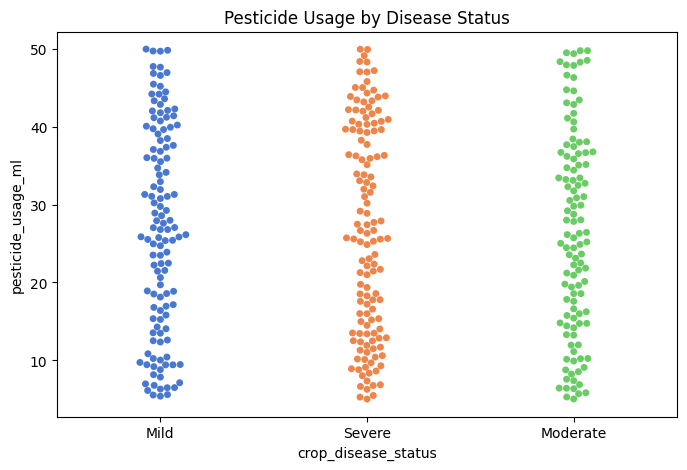

In [143]:
# 12. Swarmplot: Pesticide usage by crop disease status
plt.figure(figsize=(8, 5))
sns.swarmplot(x='crop_disease_status', y='pesticide_usage_ml', data=df, palette='muted')
plt.title("Pesticide Usage by Disease Status")
plt.savefig('swarmplot_pesticide_usage_by_disease_status.png', bbox_inches='tight')
plt.show()

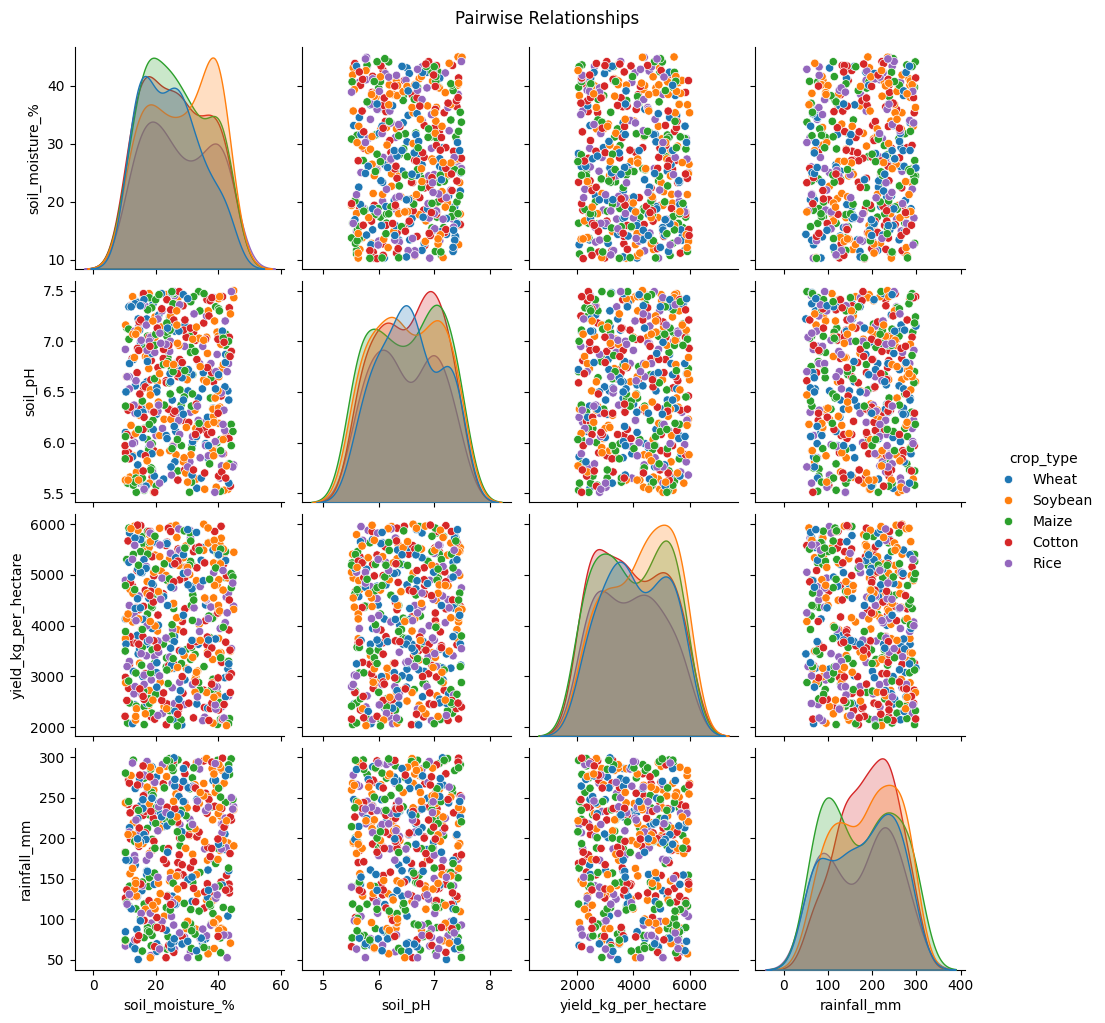

In [144]:
# 13. PairPlot: Key variables
pairplot_fig = sns.pairplot(df, vars=['soil_moisture_%', 'soil_pH', 'yield_kg_per_hectare', 'rainfall_mm'], hue='crop_type', palette='tab10')
plt.suptitle("Pairwise Relationships", y=1.02)
pairplot_fig.fig.savefig('pairplot_key_variables.png', bbox_inches='tight')
plt.show()

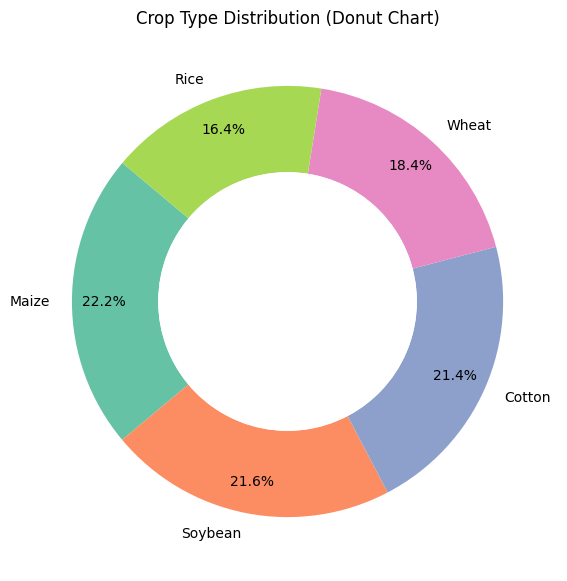

In [145]:
# 14. Donut chart: Proportion of crop types
plt.figure(figsize=(8, 7))
size = 0.4
crop_counts = df['crop_type'].value_counts()
patches, texts, autotexts = plt.pie(
    crop_counts, 
    labels=crop_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    pctdistance=0.85, 
    colors=plt.cm.Set2.colors, 
    wedgeprops=dict(width=size)
)
plt.title("Crop Type Distribution (Donut Chart)")
plt.gca().add_artist(plt.Circle((0,0),0.6,fc='white'))
plt.savefig('donutchart_crop_type_distribution.png', bbox_inches='tight')
plt.show()

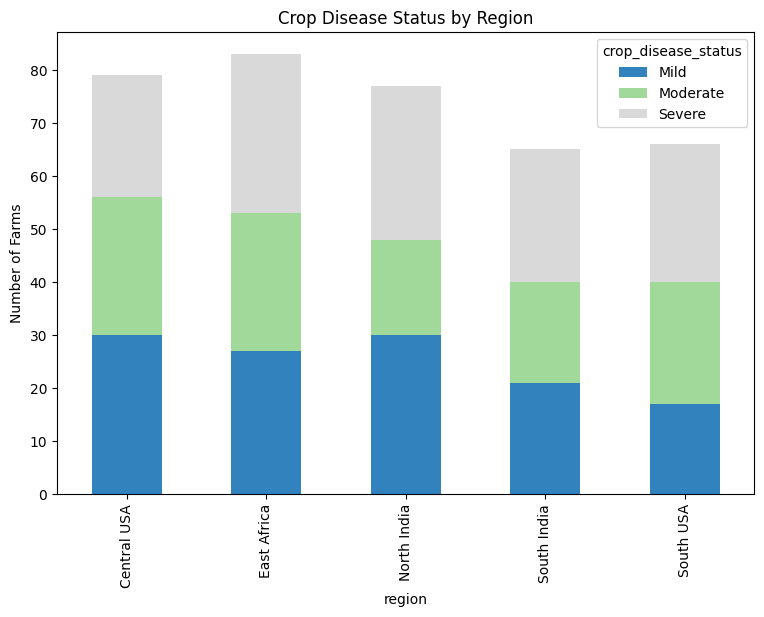

In [146]:
# 15. Stacked bar plot: Crop disease status by region
ct = pd.crosstab(df['region'], df['crop_disease_status'])
ax = ct.plot(kind='bar', stacked=True, figsize=(9,6), colormap='tab20c')
plt.title("Crop Disease Status by Region")
plt.ylabel('Number of Farms')
plt.savefig('stackedbar_crop_disease_by_region.png', bbox_inches='tight')
plt.show()

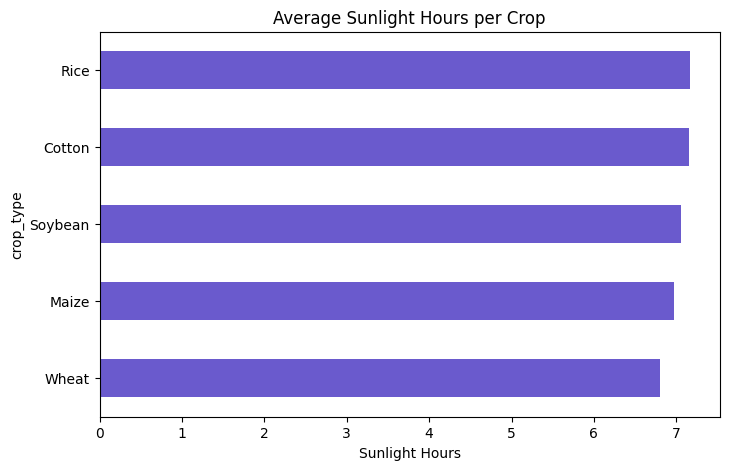

In [147]:
# 16. Horizontal bar: Average sunlight hours per crop type
plt.figure(figsize=(8, 5))
df.groupby('crop_type')['sunlight_hours'].mean().sort_values().plot(kind='barh', color='slateblue')
plt.title('Average Sunlight Hours per Crop')
plt.xlabel('Sunlight Hours')
plt.savefig('barh_avg_sunlight_hours_per_crop.png', bbox_inches='tight')
plt.show()


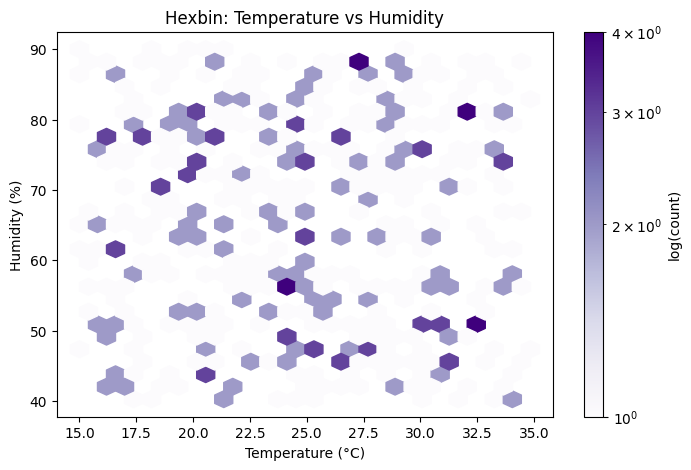

In [148]:
# 17. Hexbin plot: Temperature vs Humidity
plt.figure(figsize=(8, 5))
plt.hexbin(df['temperature_C'], df['humidity_%'], gridsize=25, cmap='Purples', bins='log')
plt.colorbar(label='log(count)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Hexbin: Temperature vs Humidity')
plt.savefig('hexbin_temperature_vs_humidity.png', bbox_inches='tight')
plt.show()

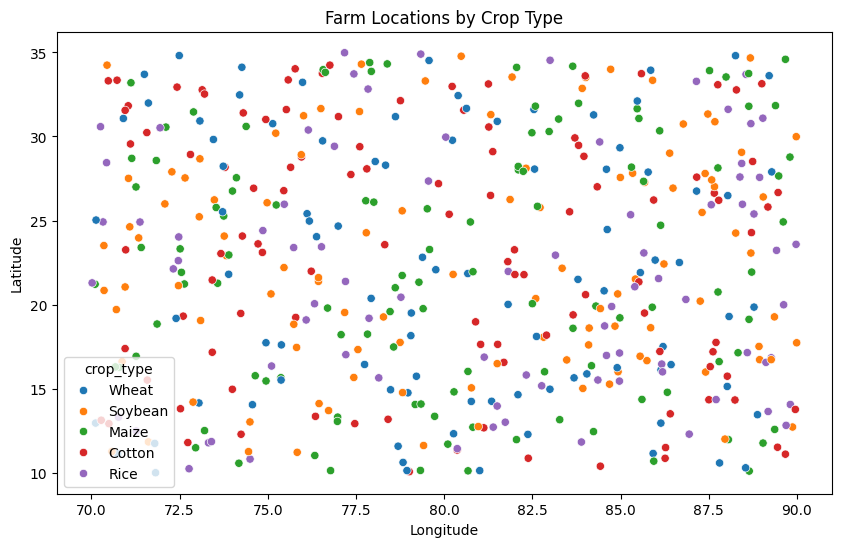

In [151]:
# 18. Scatterplot on map: Farm locations colored by crop type
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', hue='crop_type', data=df, palette='tab10')
plt.title("Farm Locations by Crop Type")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig('scattermap_farm_locations_by_crop_type.png', bbox_inches='tight')
plt.show()

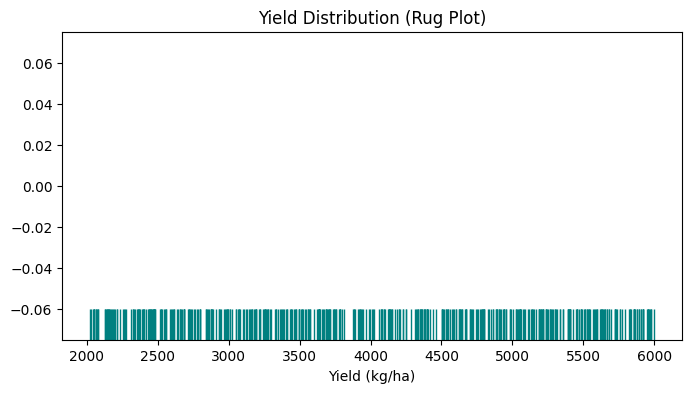

In [152]:
# 19. Rug plot: Yield distribution
plt.figure(figsize=(8, 4))
sns.rugplot(x='yield_kg_per_hectare', data=df, height=0.1, color='teal')
plt.title('Yield Distribution (Rug Plot)')
plt.xlabel("Yield (kg/ha)")
plt.savefig('rugplot_yield_distribution.png', bbox_inches='tight')
plt.show()

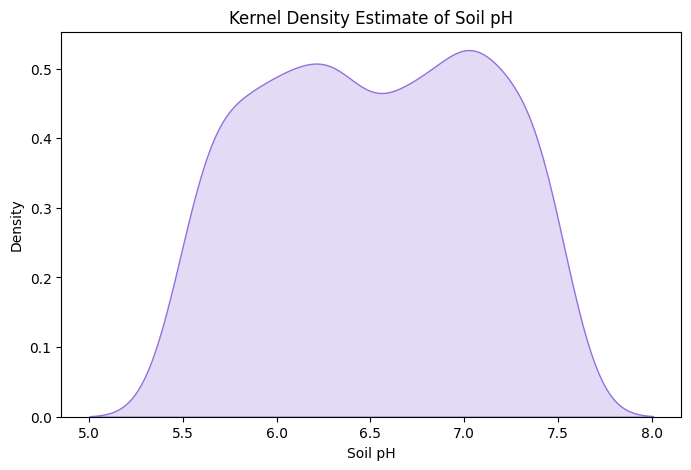

In [153]:
# 20. KDE plot: Distribution of soil pH
plt.figure(figsize=(8, 5))
sns.kdeplot(df['soil_pH'], fill=True, color='mediumpurple')
plt.title('Kernel Density Estimate of Soil pH')
plt.xlabel('Soil pH')
plt.savefig('kdeplot_soil_pH_distribution.png', bbox_inches='tight')
plt.show()